# Procesamiento de Audio

El siguiente ejemplo muestra la aplicación del Álgebra Lineal al Procesamiento de Audio, y cómo el cambio de espacio vectorial permite un mejor análisis del mismo.

In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

### Lectura de archivo WAV
Se realiza la lectura del archivo WAV y se asigan dos canales *lef* y *right*.

In [2]:
[rate, song] = wavfile.read('Perfect Strangers.wav')

left_channel = song[:,0]
right_channel = song[:,1]

reduced_factor = 200

/home/manuel/anaconda3/envs/LUT/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


### Gráfico de los canales de audio
Se grafica una cantidad de muestras de los canales *left* y *right* y se suman ambos canales. 

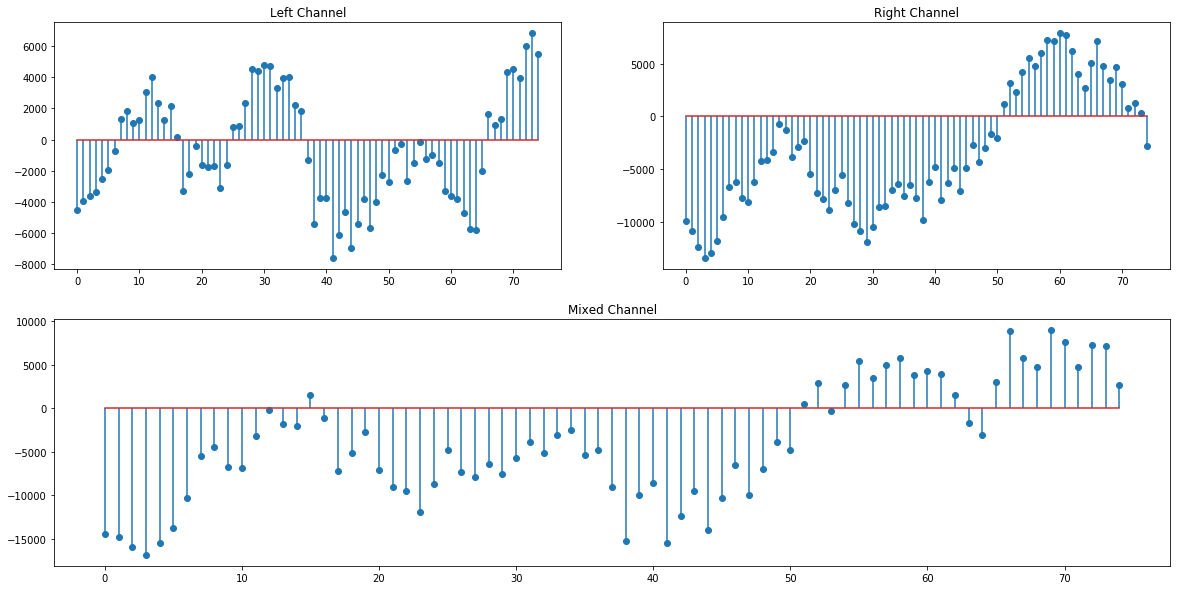

In [3]:
samples = 75

plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(2,2,1)
plt.stem(left_channel[0:samples], use_line_collection=True);
plt.title("Left Channel")
plt.subplot(2,2,2)
plt.stem(right_channel[0:samples], use_line_collection=True);
plt.title("Right Channel");
plt.subplot(2,1,2)
plt.stem(left_channel[0:samples]+right_channel[0:samples], use_line_collection=True);
plt.title("Mixed Channel");

### Generación de archivo WAV de la mezcla

In [4]:
wavfile.write('Sum Perfect Strangers.wav', rate, (left_channel+right_channel)/reduced_factor)

# Transformación de Fourier

Es una transformación que pasa de un espacio de $\mathbb{R}^2$ (tiempo y aplitud) a $\mathbb{R}^3$ (tiempo, componente senoiday cosenoidal).

In [5]:
left_fft = np.fft.fft(left_channel)
right_fft = np.fft.fft(right_channel)
mixed = left_fft + right_fft
mixed_ifft = np.real(np.fft.ifft(mixed))

frequency = np.linspace(0,rate/2,samples)

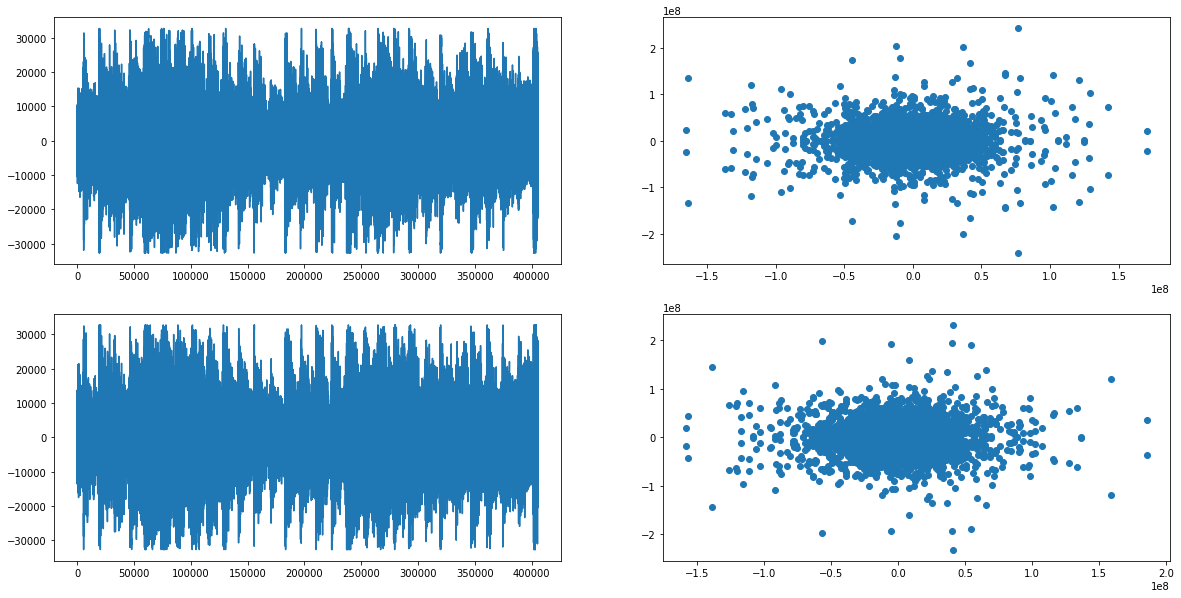

In [6]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(2,2,1)
plt.plot(left_channel)
plt.subplot(2,2,2)
plt.scatter(np.real(left_fft), np.imag(left_fft))
plt.subplot(2,2,3)
plt.plot(right_channel)
plt.subplot(2,2,4)
plt.scatter(np.real(right_fft), np.imag(right_fft));

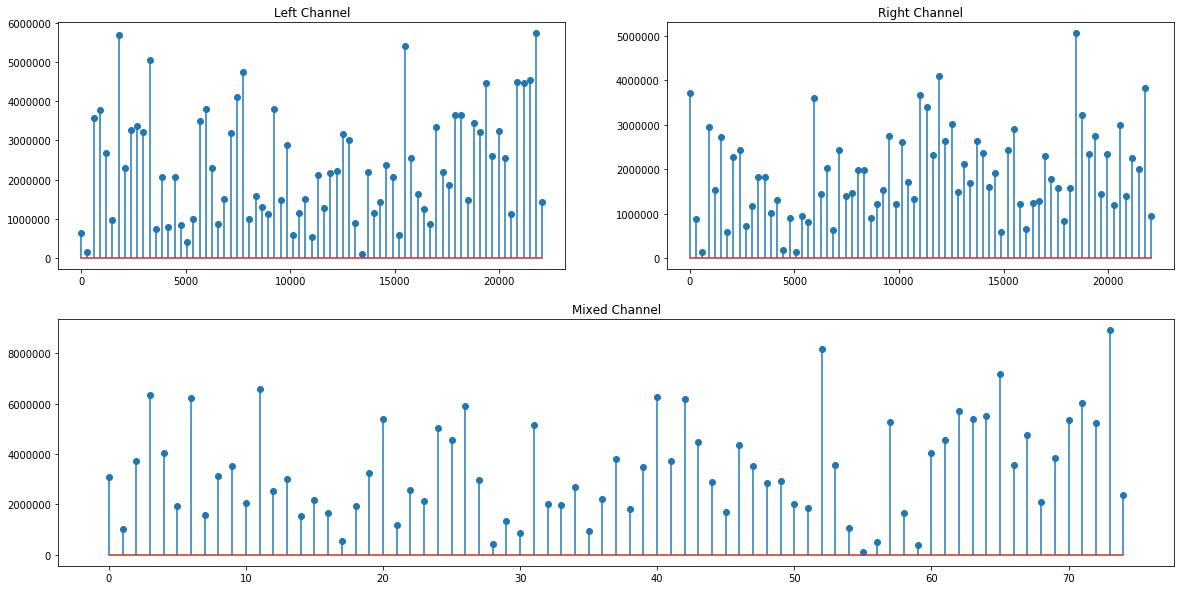

In [7]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(2,2,1)
plt.stem(frequency, np.abs(left_fft[0:samples]), use_line_collection=True);
plt.title("Left Channel")
plt.subplot(2,2,2)
plt.stem(frequency, np.abs(right_fft[0:samples]), use_line_collection=True);
plt.title("Right Channel");
plt.subplot(2,1,2)
plt.stem(np.abs(mixed[0:samples]), use_line_collection=True);
plt.title("Mixed Channel");

## Mezcla de Audio

In [8]:
left_fft = np.fft.fft(left_channel)
right_fft = np.fft.fft(right_channel)
mixed = left_fft + right_fft
mixed_ifft = np.real(np.fft.ifft(mixed))

wavfile.write('Sum IFFT Perfect Strangers.wav', rate, mixed_ifft/reduced_factor)